# Mars Weather

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from splinter import Browser

In [2]:
browser = Browser("chrome")

## Step 1: Visit the Website

In [3]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

## Step 2: Scrape the Table

In [4]:
soup = BeautifulSoup(browser.html, "html.parser")

In [5]:
header = [entry.text for entry in soup.find("table", {"class":"table"}).find("tr").find_all("th")]
rows = soup.find("table", {"class":"table"}).find_all("tr", {"class":"data-row"})

## Step 3: Store the Data

In [6]:
data = []

In [7]:
for row in rows:
    data.append([entry.text for entry in row.find_all("td")])

In [8]:
data_df = pd.DataFrame(data, columns=header)
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## Step 4: Prepare the Data

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
data_df["terrestrial_date"] = pd.to_datetime(data_df["terrestrial_date"])
data_df["sol"] = data_df["sol"].astype(int)
data_df["ls"] = data_df["ls"].astype(int)
data_df["month"] = data_df["month"].astype(int)
data_df["min_temp"] = data_df["min_temp"].astype(float)
data_df["pressure"] = data_df["pressure"].astype(float)

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


## Step 5: Analyze the Data

In [12]:
num_of_months = data_df["month"].nunique()
num_of_months

12

In [13]:
num_of_sols = data_df["sol"].count()
num_of_sols

np.int64(1867)

### Average Minimum Temperature: Month 3 had the lowest, Month 8 had the highest

In [14]:
average_min_temperature_per_month = data_df.groupby("month")["min_temp"].mean()
average_min_temperature_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

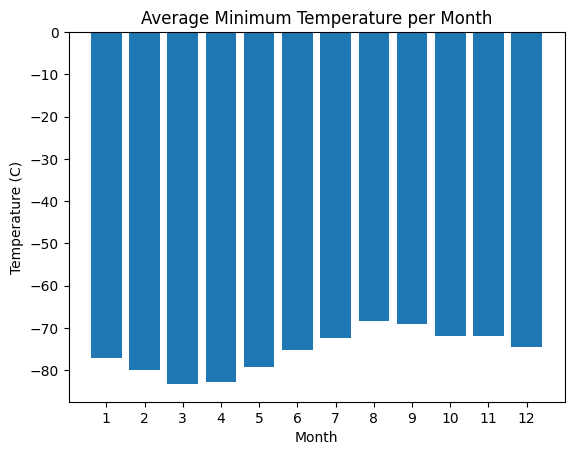

In [15]:
# figure
plt.bar(average_min_temperature_per_month.index.astype(str), average_min_temperature_per_month.values)

# formatting
plt.title("Average Minimum Temperature per Month")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")

# show
plt.show()

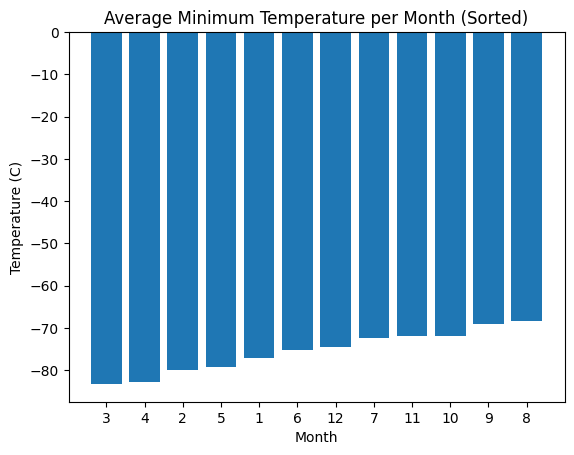

In [16]:
# data
average_min_temperature_per_month_sorted = average_min_temperature_per_month.sort_values(ascending=True)

# figure
plt.bar(average_min_temperature_per_month_sorted.index.astype(str), average_min_temperature_per_month_sorted.values)

# formatting
plt.title("Average Minimum Temperature per Month (Sorted)")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")

# show
plt.show()

### Average Pressure: Month 6 had the lowest, Month 9 had the highest

In [17]:
average_pressure_per_month = data_df.groupby("month")["pressure"].mean()
average_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

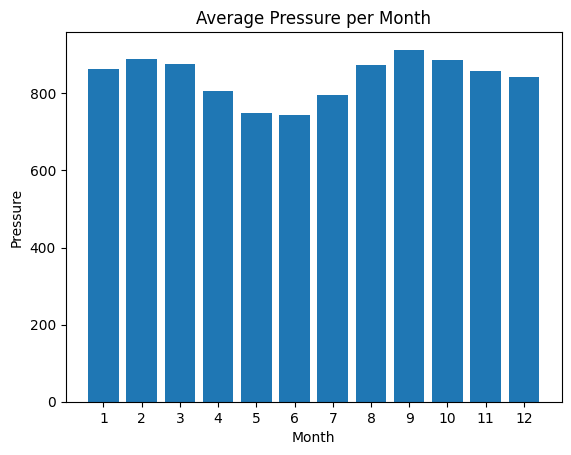

In [18]:
# figure
plt.bar(average_pressure_per_month.index.astype(str), average_pressure_per_month.values)

# formatting
plt.title("Average Pressure per Month")
plt.xlabel("Month")
plt.ylabel("Pressure")

# show
plt.show()

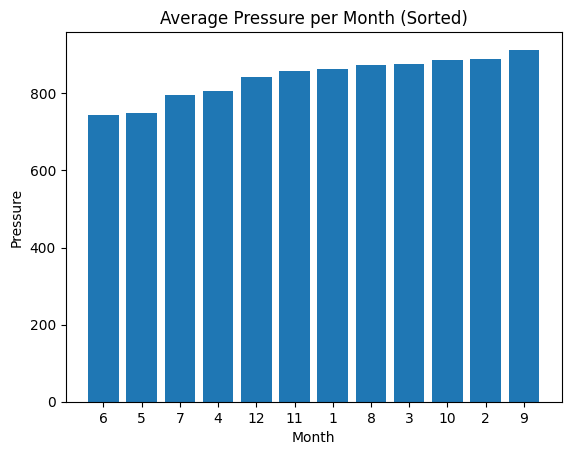

In [19]:
# data
average_pressure_per_month_sorted = average_pressure_per_month.sort_values(ascending=True)

# figure
plt.bar(average_pressure_per_month_sorted.index.astype(str), average_pressure_per_month_sorted.values)

# formatting
plt.title("Average Pressure per Month (Sorted)")
plt.xlabel("Month")
plt.ylabel("Pressure")

# show
plt.show()

### Earth days: ~700 terrestrial days in a Martian year

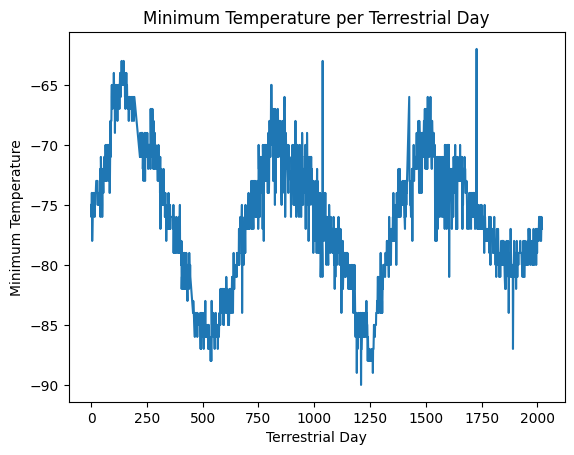

In [20]:
# data
min_temperature_per_terrestrial_date = data_df.set_index("terrestrial_date")["min_temp"]
num_of_days = (min_temperature_per_terrestrial_date.index - min_temperature_per_terrestrial_date.index.min()).days

# figure
plt.plot(num_of_days, min_temperature_per_terrestrial_date.values)

# formatting
plt.title("Minimum Temperature per Terrestrial Day")
plt.xlabel("Terrestrial Day")
plt.ylabel("Minimum Temperature")

# show
plt.show()

## Step 6: Save the Data

In [ ]:
data_df.to_csv("output/mars_weather_data.csv", index=False)

In [22]:
browser.quit()